In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("AI_Generated_Essays_Dataset.csv")
df.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1460 non-null   object
 1   generated  1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


In [ ]:
df['generated'].value_counts()

,count
generated,
0,1375
1,85


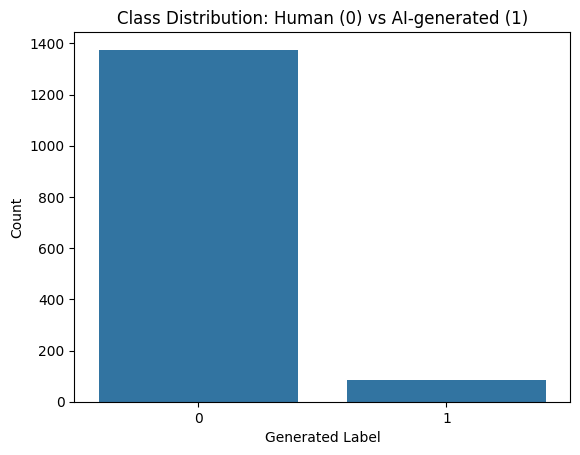

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='generated', data=df)
plt.title("Class Distribution: Human (0) vs AI-generated (1)")
plt.xlabel("Generated Label")
plt.ylabel("Count")
plt.show()

In [ ]:
X = df['text']
y = df['generated']

In [ ]:
import re
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'http\S+ | www\S+ | https\S+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\d+', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [lemmatizer.lemmatize(word)for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [ ]:
X.apply(clean_text)

,text
0,machine learning subset artificial intelligenc...
1,decision tree prominent machine learning algor...
2,education cornerstone societal progress extend...
3,computer backbone modern technology revolution...
4,chess timeless game strategy intellect transce...
...,...
1455,fuss elector college many people get confused ...
1456,limiting car usage many advantage putting lot ...
1457,there new trend developing year soon full thro...
1458,know car big part society today however car bi...


In [ ]:
Xcompared_df = pd.DataFrame({
    "Original Text":df['text'],
    "Cleaned Text": X
})

pd.set_option('display.max_colwidth', None)

Xcompared_df.head(5)

,Original Text,Cleaned Text
0,"Machine learning, a subset of artificial intelligence, has rapidly emerged as a transformative force, revolutionizing industries and redefining the possibilities of technology. At its core, machine learning enables computers to learn from data and make informed decisions without explicit programming, with applications ranging from image recognition and language processing to autonomous systems. As machine learning continues to advance, it brings both opportunities and challenges, with issues of bias, transparency, and privacy demanding careful consideration. The impact of machine learning is profound, shaping a future where intelligent systems contribute to efficiency, innovation, and a more interconnected world.","Machine learning, a subset of artificial intelligence, has rapidly emerged as a transformative force, revolutionizing industries and redefining the possibilities of technology. At its core, machine learning enables computers to learn from data and make informed decisions without explicit programming, with applications ranging from image recognition and language processing to autonomous systems. As machine learning continues to advance, it brings both opportunities and challenges, with issues of bias, transparency, and privacy demanding careful consideration. The impact of machine learning is profound, shaping a future where intelligent systems contribute to efficiency, innovation, and a more interconnected world."
1,"A decision tree, a prominent machine learning algorithm, structures decision-making in a tree-like model. Nodes represent decisions, branches signify outcomes, and leaves denote final decisions or predictions. The algorithm evaluates input features at each internal node, guiding the path to subsequent nodes until a leaf node is reached, yielding the final decision. This method accommodates both categorical and numerical data, offering interpretability through a visual representation. However, decision trees may suffer from overfitting, addressed through techniques like pruning and ensemble methods. Despite challenges, decision trees stand as versatile tools, finding applications in classification and regression tasks with a balance of simplicity and effectiveness.","A decision tree, a prominent machine learning algorithm, structures decision-making in a tree-like model. Nodes represent decisions, branches signify outcomes, and leaves denote final decisions or predictions. The algorithm evaluates input features at each internal node, guiding the path to subsequent nodes until a leaf node is reached, yielding the final decision. This method accommodates both categorical and numerical data, offering interpretability through a visual representation. However, decision trees may suffer from overfitting, addressed through techniques like pruning and ensemble methods. Despite challenges, decision trees stand as versatile tools, finding applications in classification and regression tasks with a balance of simplicity and effectiveness."
2,"Education, a cornerstone of societal progress, extends beyond the classroom, shaping individuals and fostering the development of nations. It encompasses formal and informal learning, equipping individuals with knowledge, skills, and critical thinking abilities. In the digital age, technology enhances educational access, offering online platforms, adaptive learning, and interactive tools. However, challenges such as educational inequality persist, demanding efforts to ensure inclusive and equitable learning opportunities. As education evolves, a holistic approach that integrates technology, promotes diversity, and addresses societal needs becomes imperative for fostering well-rounded, informed citizens capable of navigating an ever-changing world.","Education, a cornerstone of societal progress, extends beyond the classroom, shaping individuals and fostering the development of nations. It encompasses formal and informal learning, equipping individ

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 331607 stored elements and shape (1460, 17633)>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(f"Classification reports: \n{classification_report(y_pred, y_test)}")

Classification reports: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       0.95      0.90      0.93        21

    accuracy                           0.99       292
   macro avg       0.97      0.95      0.96       292
weighted avg       0.99      0.99      0.99       292



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Cross validation score f1 macro: ", scores.mean())

Cross validation score f1 macro:  0.9472014285468097


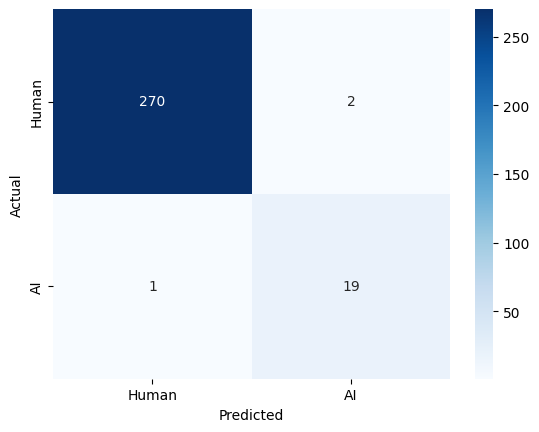

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'ai_essay_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']